In [37]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn import svm
from PIL import Image

from sklearn.model_selection import GridSearchCV

In [38]:
loaded_model = pickle.load(open('savedmodel.sav', 'rb')) 
path = '/Segmentation_samples'

filepaths = [os.path.join(r,file) for r,d,f in os.walk(os.getcwd() + path) for file in f]
filepaths = [x for x in filepaths if x.endswith(".PNG")]

In [39]:
Labels = [ ]
x_test = [ ]
numberOfLabel = 0

#i = '018.bmp'
img =Image.open("018.bmp")
newsize = (96, 96)
img = img.resize(newsize,Image.LANCZOS)

img = np.asarray(img)
img = img / 255
for i in range(newsize[0]):
  for j in range(newsize[1]):
    x_test.append(img[i,j])
    Labels.append(numberOfLabel)
    numberOfLabel += 1
    if numberOfLabel == 3:
        numberOfLabel = 0

#print(x_test)
#print(Labels)
#print(Labels.shape)


In [40]:
# PLACEHOLDER MEAN COLORING

i = filepaths[0] # Inner
img_1 = Image.open(i)
newsize = (96, 96)
img_1 = img_1.resize(newsize)
img_1 = np.asarray(img_1)
img_1 = np.delete(img_1,3,axis=2)

i = filepaths[1] # Outer
img_2 = Image.open(i)
newsize = (96, 96)
img_2 = img_2.resize(newsize)
img_2 = np.asarray(img_2)
img_2 = np.delete(img_2,3,axis=2)

i = filepaths[2] #BACKGROUND
img_3 = Image.open(i)
newsize = (96, 96)
img_3 = img_3.resize(newsize)
img_3 = np.asarray(img_3)
img_3 = np.delete(img_3,3,axis=2)

In [41]:
# Coloring preparation
img_inner_mean = np.mean(img_1, axis=(0, 1))
img_outer_mean = np.mean(img_2, axis=(0, 1))
img_background_mean = np.mean(img_3, axis=(0, 1))

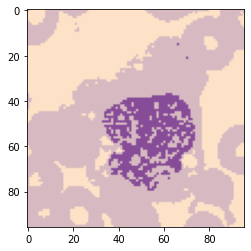

In [43]:
y_pred=loaded_model.predict(x_test)
labelcount = 0
w, h = 96, 96
newImage = np.zeros((h, w, 3), dtype=np.uint8)

for i in range(newsize[0]):
    
    for j in range(newsize[1]):
        
        if y_pred[labelcount] == 0:
            newImage[i,j] = img_inner_mean
        elif y_pred[labelcount] == 1:
            newImage[i,j] = img_outer_mean
        else:
            newImage[i,j] = img_background_mean
            
        labelcount += 1
        
newImageConverted = Image.fromarray(newImage)
plt.imshow(newImageConverted)
plt.show()